In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.17.0


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
training_dir = Path(r"/Users/macbookairm2/Desktop/GroupAssignment/Calorie_Counter/Fruit_Dataset/train")
train_data = list(training_dir.glob(r'*/*.jpg'))

In [4]:
testing_dir = Path(r"/Users/macbookairm2/Desktop/GroupAssignment/Calorie_Counter/Fruit_Dataset/test")
test_data = list(training_dir.glob(r'*/*.jpg'))

In [5]:
validating_dir = Path(r"/Users/macbookairm2/Desktop/GroupAssignment/Calorie_Counter/Fruit_Dataset/validation")
valid_data = list(training_dir.glob(r'*/*.jpg'))

In [6]:
def image_processing(filepath):
    """ Creating a DataFrame with the filepath and the labels of the pictures
    """
    
    valid_paths = []
    labels = []
    
    for path in filepath:
        if os.path.exists(path):
            valid_paths.append(path)
            labels.append(os.path.basename(os.path.dirname(path)))
        else:
            print(f"Invalid path or file does not exist:, {path}")
            
    filepath_series = pd.Series(valid_paths, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')
    
    #Creating DataFrame with Filepath and Labels
    df = pd.concat([filepath_series, labels_series ], axis=1)
    
    #Shuffling the dataset and reseting the index
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df                      

In [7]:
train_df = image_processing(train_data)
test_df = image_processing(test_data)
valid_df = image_processing(valid_data)

In [8]:
print(f'Number of Images: {train_df.shape[0]}\n')
print(f'Number of Different Labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

Number of Images: 2780

Number of Different Labels: 36

Labels: ['tomato' 'ginger' 'corn' 'potato' 'spinach' 'beetroot' 'turnip'
 'jalepeno' 'capsicum' 'mango' 'cabbage' 'pineapple' 'paprika'
 'pomegranate' 'cucumber' 'pear' 'watermelon' 'raddish' 'orange'
 'soy beans' 'sweetcorn' 'grapes' 'onion' 'banana' 'lettuce' 'garlic'
 'chilli pepper' 'peas' 'lemon' 'eggplant' 'bell pepper' 'sweetpotato'
 'kiwi' 'carrot' 'apple' 'cauliflower']


In [9]:
train_df.head(5)

,Filepath,Label
0,/Users/macbookairm2/Desktop/GroupAssignment/Ca...,tomato
1,/Users/macbookairm2/Desktop/GroupAssignment/Ca...,ginger
2,/Users/macbookairm2/Desktop/GroupAssignment/Ca...,corn
3,/Users/macbookairm2/Desktop/GroupAssignment/Ca...,potato
4,/Users/macbookairm2/Desktop/GroupAssignment/Ca...,potato


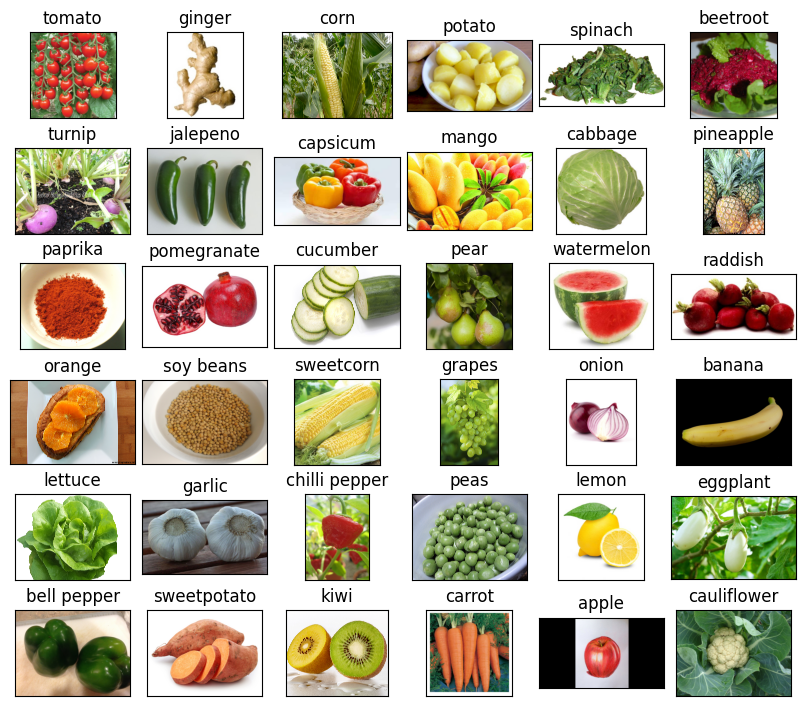

In [10]:
# Creating a dataframe with one label of each category
df_unique = train_df.copy().drop_duplicates(subset=['Label']).reset_index()

#Displaying pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8,7), 
                         subplot_kw={'xticks':[], 'yticks':[]})


for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize=12)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)


In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size=32,
    shuffle=True,
    seed = 0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 2780 validated image filenames belonging to 36 classes.


In [13]:
val_images = train_generator.flow_from_dataframe(
    dataframe = valid_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size=32,
    shuffle=True,
    seed = 0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 2780 validated image filenames belonging to 36 classes.


In [14]:
test_images = test_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size=32,
    shuffle=False,
)

Found 2780 validated image filenames belonging to 36 classes.
